In [ ]:
import os
changed_dir = False
if not changed_dir:
    os.chdir("..")
    changed_dir=True

In [29]:
import pandas as pd
import plotly.express as px

data = pd.read_csv("/home/piotr/Documents/mgr/uwb-rs/data-processing/data/p1/2023-07-04-21:53:06.442332living-room-p1-1.csv")

TAG: dict[str, tuple[int, int]] = {
    "P1": (1560, 1700),
    "P2": (2185, 2550),
    "P3": (1560, 2990),
    "P4": (775, 2130),
    "P5": (1560, 0),
    "P6": (1560, 840),
}

fig = px.box(data, x="anchor", y="distance", points="all")
fig.show()

In [30]:
df = data.drop(columns=['timestamp'])
df.groupby(["anchor"]).mean()

,Unnamed: 0,distance,instant,acc_x,acc_y,acc_z,los_confidence
anchor,,,,,,,
0x26bd,230.0,3773.947265,5.836903e+11,1.056209,-0.117235,0.003009,0.991304
0x5601,230.0,2920.719568,6.000079e+11,1.056431,-0.116940,0.002845,0.936863
0x5836,231.0,3619.374853,5.920194e+11,1.056330,-0.116913,0.002826,0.834783
0x6c0d,229.0,2828.371524,5.753883e+11,1.056122,-0.117087,0.002661,1.000000


In [34]:
# from coords import COORDS
from easy_trilateration.model import *
from easy_trilateration.least_squares import easy_least_squares
from easy_trilateration.graph import *
from math import sqrt
import matplotlib.pyplot as plt

def distance(p1:Point ,p2: Point):
    ax, ay = p1.x, p1.y
    bx, by = p2.x, p2.y
    return sqrt((bx - ax) ** 2 + (by - ay) ** 2)


COORDS: dict[str, tuple[int, int]] = {
    "0x6c0d": (0, 0),
    "0x5601": (3400, 0),
    "0x26bd": (3400, 4350),
    "T": TAG["P1"],
}
df = df[df["anchor"].isin(COORDS.keys())]

arr = [Circle(COORDS[row["anchor"]][0], COORDS[row["anchor"]][1], row["distance"]) for _, row in df.iterrows()]

# arr = [Circle(100, 100, 50),  
# Circle(100, 50, 50),
# Circle(50, 50, 50),
# Circle(50, 100, 50)]
          
result, meta = easy_least_squares(arr)  
print(result)
print(f'{distance(result.center, Point(*COORDS["T"]))}mm')

Circle(1636.5209735127796, 1621.3667907039069, 525.3053575753263)
109.72074093600857mm


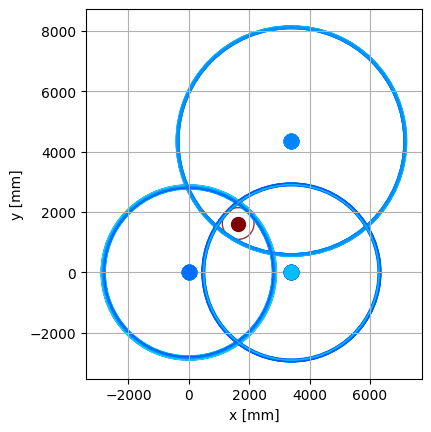

In [32]:
create_circle(result, target=True)
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.grid()
draw(arr)

In [33]:
n_samples = []
errors = []

for i in range(3,min(len(df), 100),3):
    arr = [Circle(COORDS[row["anchor"]][0], COORDS[row["anchor"]][1], row["distance"]) for _, row in df.head(i).iterrows()]
    # display(arr)
    # arr = [Circle(100, 100, 50),  
    # Circle(100, 50, 50),
    # Circle(50, 50, 50),
    # Circle(50, 100, 50)]
            
    result, meta = easy_least_squares(arr)  
    # print(result)
    n_samples.append(i)
    errors.append(distance(result.center, Point(*COORDS["T"])))
    # create_circle(result, target=True)  
    # draw(arr)
df2 = pd.DataFrame({"n_samples": n_samples, "error": errors})
# display(df2)
px.bar(df2, x="n_samples", y="error")